## Lab3
Name: Yile Wang  
Netid: yxw190015

In [1]:
import networkx as nx
import numpy
import numpy.linalg as la
import matplotlib.pyplot as plt

This function prints the top five (or `num`) nodes according to the centrality vector `v`, where `v` takes the form: `v[nidx]` is the centrality of the node that is the `nidx`-th element of `G.nodes()`

In [2]:
def print_top_5(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        #print '  %i. %s' % (i+1,G.node_object(idx))

This function returns the index of the maximum of the array. If two or more indices have the same max value, the first index is returned.

In [3]:
def index_of_max(v):
    return numpy.where(v == max(v))[0]

This function accepts a dictionary of nodes with centrality values and returns a centrality vector

In [4]:
def centrality_vector(G,d):
    thenodes = list(G.nodes())
    v = numpy.zeros((G.number_of_nodes(),))
    for i,u in enumerate(thenodes):
        v[i] = d[u]
    return v

This function provides the index of a node based on its order in `G.nodes()`

In [5]:
def node_index(G,n):
    thenodes = list(G.nodes())
    return thenodes.index(n)

Now we read in the edgelist file that contains the coappearance network we will analyze. We will look at two different networks, corresponding to only the *Lord of the Rings* series and the *Lord of the Rings* series plus the prequel, The *Hobbit*. The `unweighted` boolean, if set to `True` will set all the edge weights to one. Recall that setting all weights to 1 is different (in NetworkX) from having no weights assigned, which could be accomplished instead by: `G = nx.read_edgelist('LoTR_characters.edgelist',data=False)`.

In [6]:
unweighted = True
G = nx.read_weighted_edgelist('LotR_characters.edgelist') # just Lord of the Rings
Gh = nx.read_weighted_edgelist('hobbit_LotR_characters.edgelist') # with the Hobbit
if unweighted:
    for u,v in G.edges():
        G[u][v]['weight'] = 1
Gw = nx.read_weighted_edgelist('LotR_characters.edgelist') 


A = numpy.array(nx.adjacency_matrix(G).todense().T)
Ah = numpy.array(nx.adjacency_matrix(Gh).todense().T) 
Aw = numpy.array(nx.adjacency_matrix(Gw).todense().T)
N = G.number_of_nodes()

## Degree Centrality

### 7.1 Print out top 5 characters:

In [7]:
# Version 1: not using loop. networkx has function to compute degree. So Why not?
def degree_centrality(G, weight = None):
    if weight:
        return G.degree(weight=weight)
    else:
        return G.degree

# Version 2: using loop
def degree_centrality(G, weight=False):
    nodes_dict = {}
    for i in G.nodes():
        nodes_dict[i] = 0
    for u,v in G.edges():
        if weight:
            nodes_dict[u] += G[u][v]['weight']
            nodes_dict[v] += G[u][v]['weight'] 
        else:
            nodes_dict[u] += 1
            nodes_dict[v] += 1
    return nodes_dict


    
centrality_vector = [i for i in degree_centrality(G).values()]
print('degree centrality, unweigted:')
print_top_5(G, centrality_vector)

centrality_vector_w = [i for i in degree_centrality(Gw, weight=True).values()]
print('degree_centrality, weighted:')
print_top_5(Gw, centrality_vector_w)

centrality_vector_h = [i for i in degree_centrality(Gh, weight=True).values()]
print('degree_centrality, hobbit:')
print_top_5(Gh, centrality_vector_h)

degree centrality, unweigted:
  1. gandalf (153.0000)
  2. frodo (144.0000)
  3. aragorn (140.0000)
  4. pippin (137.0000)
  5. elrond (125.0000)
degree_centrality, weighted:
  1. gandalf (762.0000)
  2. frodo (661.0000)
  3. aragorn (632.0000)
  4. pippin (606.0000)
  5. elrond (484.0000)
degree_centrality, hobbit:
  1. gandalf (901.0000)
  2. frodo (661.0000)
  3. aragorn (632.0000)
  4. pippin (606.0000)
  5. bilbo (602.0000)


## Eigenvector Centrality

### 7.2 First method: networkx:

In [8]:
eigencentrality_vector = [i for i in nx.eigenvector_centrality(G).values()]
print(f'Eigenvector Centrality unweighted(by NetworkX):')
print_top_5(G, eigencentrality_vector)


eigencentrality_vector = [i for i in nx.eigenvector_centrality(Gw, weight='weight').values()]
print(f'Eigenvector Centrality weighted(by NetworkX):')
print_top_5(Gw, eigencentrality_vector)

eigencentrality_vector = [i for i in nx.eigenvector_centrality(Gh, weight='weight').values()]
print(f'Eigenvector Centrality hobbit(by NetworkX):')
print_top_5(Gh, eigencentrality_vector)

Eigenvector Centrality unweighted(by NetworkX):
  1. gandalf (0.1682)
  2. aragorn (0.1641)
  3. frodo (0.1618)
  4. elrond (0.1541)
  5. pippin (0.1533)
Eigenvector Centrality weighted(by NetworkX):
  1. gandalf (0.3412)
  2. frodo (0.2920)
  3. aragorn (0.2908)
  4. pippin (0.2839)
  5. sauron (0.2300)
Eigenvector Centrality hobbit(by NetworkX):
  1. gandalf (0.3570)
  2. frodo (0.2827)
  3. aragorn (0.2783)
  4. pippin (0.2723)
  5. bilbo (0.2287)


### 7.2 Second method: Linear Algebra

In [9]:
### Linear Algebra Version
def eigenvector_centrality(G):
    A = numpy.array(nx.adjacency_matrix(G).todense().T)
    N = G.number_of_nodes()
    eigenvalue, eigenvector = la.eig(A)
    eigenvalue = numpy.abs(eigenvalue)
    eigenvector = numpy.abs(eigenvector)
    nodes_dict = {}
    x = 1/max(eigenvalue)*numpy.dot(A, eigenvector[:,numpy.argmax(eigenvalue)])
    for index, node in enumerate(G.nodes()):
        nodes_dict[node] = x[index]
    return nodes_dict

print('Eigenvector Centrality unweighted (by linear algebra):')
eigencentrality_vector_la = [i for i in eigenvector_centrality(G).values()]
print_top_5(G, eigencentrality_vector_la)

print('Eigenvector Centrality weighted (by linear algebra):')
eigencentrality_vector_la = [i for i in eigenvector_centrality(Gw).values()]
print_top_5(Gw, eigencentrality_vector_la)

print('Eigenvector Centrality hobbit (by linear algebra):')
eigencentrality_vector_la = [i for i in eigenvector_centrality(Gh).values()]
print_top_5(Gh, eigencentrality_vector_la)

Eigenvector Centrality unweighted (by linear algebra):
  1. gandalf (0.1682)
  2. aragorn (0.1641)
  3. frodo (0.1618)
  4. elrond (0.1541)
  5. pippin (0.1533)
Eigenvector Centrality weighted (by linear algebra):
  1. gandalf (0.3412)
  2. frodo (0.2920)
  3. aragorn (0.2908)
  4. pippin (0.2839)
  5. sauron (0.2300)
Eigenvector Centrality hobbit (by linear algebra):
  1. gandalf (0.3570)
  2. frodo (0.2827)
  3. aragorn (0.2783)
  4. pippin (0.2723)
  5. bilbo (0.2287)


### Define the eigenvalue and eigenvectors for three different graphs

In [10]:
k, v = la.eig(A)
k= numpy.abs(k)
k1_idx = index_of_max(k) # find the index of the largest eigenvalue
# finish printing the top 5 eigenvector centrality characters by linear algebra

kw, vw = la.eig(Aw)
kw = numpy.abs(kw)
k1_idx = index_of_max(kw) # find the index of the largest eigenvalue


kh, vh = la.eig(Ah)
kh=numpy.abs(kh)
k1_idx = index_of_max(kh) # find the index of the largest eigenvalue

### 7.2 Print two quantities: Centrality of the Character and neighbors

In [11]:
# Arwen
noi = 'arwen'
noi_idx = node_index(Gw,noi)
print(f"The eigenvector centrality of Arwen in unweighted graph is {eigenvector_centrality(G)[noi]}")
print(f"The eigenvector centrality of Arwen in weighted graph is {eigenvector_centrality(Gw)[noi]}")
print(f"The eigenvector centrality of Arwen in Hobbit graph is {eigenvector_centrality(Gh)[noi]}")

# His neighbours

neighbours_G = [eigenvector_centrality(G)[i]*(1/max(k)) for i in G.neighbors(noi)]
neighbours_Gw = [eigenvector_centrality(Gw)[i]*(1/max(kw)) for i in Gw.neighbors(noi)]
neighbours_Gh = [eigenvector_centrality(Gh)[i]*(1/max(kh)) for i in Gh.neighbors(noi)]
print(f'The eigenvector centrality of unweighted graph in all the neighbours of Arwen is {sum(neighbours_G)}')
print(f'The eigenvector centrality of weighted graph in all the neighbours of Arwen is {sum(neighbours_Gw)}')
print(f'The eigenvector centrality of hobbit graph in all the neighbours of Arwen is {sum(neighbours_Gh)}')
# print('Confirming that eigenvector centrality is a steady-state of sorts for node %s:' % noi)
# compare the eigenvector centrality of arwen to the sum of the centralities of its neighbors (divided by the largest eigenvalue)

The eigenvector centrality of Arwen in unweighted graph is 0.11265370336918314
The eigenvector centrality of Arwen in weighted graph is 0.055874195162251186
The eigenvector centrality of Arwen in Hobbit graph is 0.05395722545157929
The eigenvector centrality of unweighted graph in all the neighbours of Arwen is 0.11265370336918297
The eigenvector centrality of weighted graph in all the neighbours of Arwen is 0.018963916063615204
The eigenvector centrality of hobbit graph in all the neighbours of Arwen is 0.0188039372858719


### 7.2 Explanation
It's really interesting that in the weighted graphs, the results between centrality of the characters and centrality of their neighbours are unmatched.

The potential reason is that the matrix A is not an adjacency matrix. It would be a weighted determinant matrix, which will cause distortion during the computation.

### 7.2 Interpret the plot

The following section should run and produce a plot that you need to interpret.

The plot is telling us that the process how the centrality converges to the largest eigenvector. In each step, the $c_iv_i$ is giving the leading eigenvector to the x, so the iteration keeps contrubuting the highest eigenvector component to the centrality coefficient. 

Showing the convergece of eigenvector centrality...


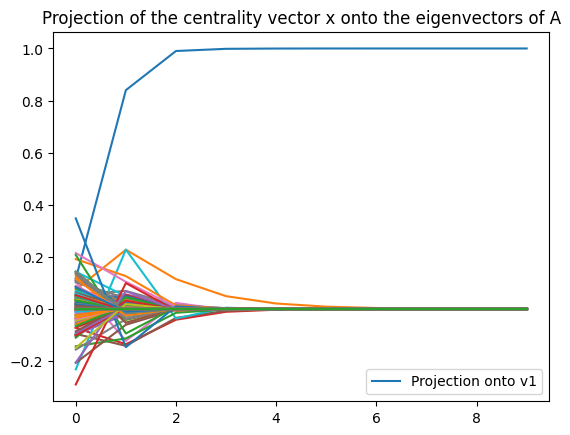

In [12]:
print('Showing the convergece of eigenvector centrality...')
num_steps = 10
x = numpy.zeros((N,1)) # initial centrality vector
x[76] = 1
cs = numpy.zeros((N,num_steps))
for i in range(num_steps):
    x = x/la.norm(x) # at each step we need to normalize the centrality vector
    for j in range(G.number_of_nodes()):
        cs[j,i] = numpy.real(numpy.dot( x.T , v[:,j] ))[0] # project x onto each of the eigenvectors
    x = numpy.dot(A,x) # "pass" the centrality one step forward

plt.figure() # this creates a figure to plot in
for i in range(G.number_of_nodes()): # for each eigenvector plot the projection of x onto it over the steps
    if i == k1_idx:
        plt.plot(range(num_steps),cs[i,:],label='Projection onto v1') # only label the eigenvector v1
    else:
        plt.plot(range(num_steps),cs[i,:])
#plt.ylim([-0.2,1.1]) # this sets the limits for the y axis
plt.legend(loc='best') # this attaches a legend
plt.title('Projection of the centrality vector x onto the eigenvectors of A') # this adds a title
plt.show() # this makes the figure appear

## 7.3 Katz Centrality
try a few values for $\alpha$ and print out top5:

In [13]:
k1 = numpy.abs(k)[k1_idx]

def katz(G,alpha, beta):
    A = numpy.array(nx.adjacency_matrix(G).todense().T)
    N = G.number_of_nodes()
    eigenvalue, eigenvector = la.eig(A)
    eigenvalue = numpy.abs(eigenvalue)
    eigenvector = numpy.abs(eigenvector)
    identity = numpy.eye(N)
    all_ones = numpy.ones((N,1))
    x = numpy.dot(la.inv(identity - alpha*A),beta*all_ones)
    nodes_dict = {}
    for index, i in enumerate(G.nodes()):
        nodes_dict[i] = x[index]
    return nodes_dict


for a in numpy.arange(0, 1/k1, 0.001):
    nodes_dict = katz(G, a, 1)
    vector = [i for i in nodes_dict.values()]
    print(f'Katz Centrality of unweighted graph: when alpha = {a}')
    print_top_5(G, vector)
    print('\n')

    nodes_dict = katz(Gw, a, 1)
    vector = [i for i in nodes_dict.values()]
    print(f'Katz Centrality of weighted graph: when alpha = {a}')
    print_top_5(Gw, vector)
    print('\n')

    nodes_dict = katz(Gh, a, 1)
    vector = [i for i in nodes_dict.values()]
    print(f'Katz Centrality of Hobbit graph: when alpha = {a}')
    print_top_5(Gh, vector)
    print('\n')

Katz Centrality of unweighted graph: when alpha = 0.0
  1. amroth (1.0000)
  2. aragorn (1.0000)
  3. arathorn (1.0000)
  4. arwen (1.0000)
  5. beregond (1.0000)


Katz Centrality of weighted graph: when alpha = 0.0
  1. amroth (1.0000)
  2. aragorn (1.0000)
  3. arathorn (1.0000)
  4. arwen (1.0000)
  5. beregond (1.0000)


Katz Centrality of Hobbit graph: when alpha = 0.0
  1. anborn (1.0000)
  2. frodo (1.0000)
  3. faramir (1.0000)
  4. gandalf (1.0000)
  5. samwise (1.0000)


Katz Centrality of unweighted graph: when alpha = 0.001
  1. gandalf (1.1605)
  2. frodo (1.1512)
  3. aragorn (1.1473)
  4. pippin (1.1439)
  5. elrond (1.1319)


Katz Centrality of weighted graph: when alpha = 0.001
  1. gandalf (2.0788)
  2. frodo (1.9325)
  3. aragorn (1.9025)
  4. pippin (1.8704)
  5. sauron (1.6945)


Katz Centrality of Hobbit graph: when alpha = 0.001
  1. gandalf (2.2803)
  2. frodo (1.9596)
  3. aragorn (1.9251)
  4. pippin (1.8933)
  5. bilbo (1.8519)


Katz Centrality of unweighte

## 7.4 PageRank
calculate pagerank centrality, and print top 5.

why $\alpha$ is upper bounded by 1?

see the pdf

In [14]:
def pagerank(G, alpha, weight = False):
    A = numpy.array(nx.adjacency_matrix(G).todense().T)
    N = G.number_of_nodes()
    identity = numpy.eye(N)
    all_ones = numpy.ones((N,1))
    degree = degree_centrality(G, weight=weight)
    degree_vector = [i for i in degree.values()]
    D = numpy.diag(degree_vector)
    x = numpy.dot(la.inv(identity - numpy.dot(alpha*A, la.inv(D))), all_ones)
    nodes_dict = {}
    for index, i in enumerate(G.nodes()):
        nodes_dict[i] = x[index]
    return nodes_dict


for a in numpy.arange(0, 1.01, 0.01):
    print(f'PageRank of unweighted graph: alpha = {a}')
    nodes_dict = pagerank(G,a)
    page_vector = [i for i in nodes_dict.values()]
    print_top_5(G, page_vector)
    print('\n')

    print(f'PageRank of weighted graph: alpha = {a}')
    nodes_dict = pagerank(Gw,a, weight=True)
    page_vector = [i for i in nodes_dict.values()]
    print_top_5(Gw, page_vector)
    print('\n')

    print(f'PageRank of Hobbit graph: alpha = {a}')
    nodes_dict = pagerank(Gh,a, weight=True)
    page_vector = [i for i in nodes_dict.values()]
    print_top_5(Gh, page_vector)
    print('\n')

PageRank of unweighted graph: alpha = 0.0
  1. amroth (1.0000)
  2. aragorn (1.0000)
  3. arathorn (1.0000)
  4. arwen (1.0000)
  5. beregond (1.0000)


PageRank of weighted graph: alpha = 0.0
  1. amroth (1.0000)
  2. aragorn (1.0000)
  3. arathorn (1.0000)
  4. arwen (1.0000)
  5. beregond (1.0000)


PageRank of Hobbit graph: alpha = 0.0
  1. anborn (1.0000)
  2. frodo (1.0000)
  3. faramir (1.0000)
  4. gandalf (1.0000)
  5. samwise (1.0000)


PageRank of unweighted graph: alpha = 0.01
  1. gandalf (1.0553)
  2. frodo (1.0521)
  3. pippin (1.0475)
  4. aragorn (1.0425)
  5. bilbo (1.0397)


PageRank of weighted graph: alpha = 0.01
  1. gandalf (1.0791)
  2. frodo (1.0762)
  3. pippin (1.0647)
  4. aragorn (1.0579)
  5. bilbo (1.0491)


PageRank of Hobbit graph: alpha = 0.01
  1. gandalf (1.0886)
  2. frodo (1.0719)
  3. bilbo (1.0628)
  4. pippin (1.0611)
  5. aragorn (1.0538)


PageRank of unweighted graph: alpha = 0.02
  1. gandalf (1.1113)
  2. frodo (1.1049)
  3. pippin (1.0956)

### 7.5 Hubs & Authorities

see the pdf

## 7.7 Betweenness Centrality
print top 5 characters

In [15]:
print('Betweenness Centrality of unweighted graph is')
betweenness_vector = [i for i in nx.betweenness_centrality(G).values()]
print_top_5(G, betweenness_vector)

print('Betweenness Centrality of weighted graph is ')
betweenness_vector = [i for i in nx.betweenness_centrality(Gw).values()]
print_top_5(Gw, betweenness_vector)

print('Betweenness Centrality of Hobbit graph is')
betweenness_vector = [i for i in nx.betweenness_centrality(Gh).values()]
print_top_5(Gh, betweenness_vector)

Betweenness Centrality of unweighted graph is
  1. gandalf (0.0797)
  2. frodo (0.0675)
  3. pippin (0.0613)
  4. aragorn (0.0486)
  5. bilbo (0.0393)
Betweenness Centrality of weighted graph is 
  1. gandalf (0.0797)
  2. frodo (0.0675)
  3. pippin (0.0613)
  4. aragorn (0.0486)
  5. bilbo (0.0393)
Betweenness Centrality of Hobbit graph is
  1. gandalf (0.1042)
  2. frodo (0.0588)
  3. bilbo (0.0563)
  4. pippin (0.0541)
  5. aragorn (0.0426)


### Weighted analysis:
All the analysis have unweighted, weighted and hobbit graph.

One change I see is from eigenvector centrality. I found that the sum of the centrality of neighbours is not equal to eigenvector centrality of the node. The potential reason is that the matrix `A` is not an adjacancy matrix so the computation results are different.

### A sequel:
Yes, that makes sense to me. The important characters are slightly different but still have huge overlap.